In [1]:
import os
import zipfile

In [3]:
# Extract the train.zip file
local_zip = 'C:/Users/USER/Downloads/Gambar/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Extract the valid.zip file
local_zip = 'C:/Users/USER/Downloads/Gambar/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/tmp/valid/grass')

In [5]:
import os

train_dandelion_dir = '/tmp/train/dandelion'
train_grass_dir = '/tmp/train/grass'

print('Dandelion images:')
print(os.listdir(train_dandelion_dir))

print('Grass images:')
print(os.listdir(train_grass_dir))

Dandelion images:
['00000000.jpg', '00000001.jpg', '00000002.jpg', '00000003.jpg', '00000004.jpg', '00000005.jpg', '00000006.jpg', '00000007.jpg', '00000008.jpg', '00000009.jpg', '00000010.jpg', '00000011.jpg', '00000012.jpg', '00000013.jpg', '00000014.jpg', '00000015.jpg', '00000016.jpg', '00000017.jpg', '00000018.jpg', '00000019.jpg', '00000020.jpg', '00000021.jpg', '00000022.jpg', '00000023.jpg', '00000024.jpg', '00000025.jpg', '00000026.jpg', '00000027.jpg', '00000028.jpg', '00000029.jpg', '00000030.jpg', '00000031.jpg', '00000032.jpg', '00000033.jpg', '00000034.jpg', '00000035.jpg', '00000036.jpg', '00000037.jpg', '00000038.jpg', '00000039.jpg', '00000040.jpg', '00000041.jpg', '00000042.jpg', '00000043.jpg', '00000044.jpg', '00000045.jpg', '00000046.jpg', '00000047.jpg', '00000048.jpg', '00000049.jpg', '00000050.jpg', '00000051.jpg', '00000052.jpg', '00000053.jpg', '00000054.jpg', '00000055.jpg', '00000056.jpg', '00000057.jpg', '00000058.jpg', '00000059.jpg', '00000060.jpg', '0000

In [6]:
import os

train_dandelion_dir = "/tmp/train/dandelion"
train_grass_dir = "/tmp/train/grass"

# hitung jumlah gambar dalam direktori train dandelion
train_dandelion_count = len(os.listdir(train_dandelion_dir))
print(f"Total gambar dandelion di direktori train: {train_dandelion_count}")

# hitung jumlah gambar dalam direktori train rumput
train_grass_count = len(os.listdir(train_grass_dir))
print(f"Total gambar rumput di direktori train: {train_grass_count}")


Total gambar dandelion di direktori train: 500
Total gambar rumput di direktori train: 499


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.grid"] = False


Dalam kode di atas, kita mengatur ukuran gambar yang akan ditampilkan (dalam satuan inci), dan kita mematikan grid pada gambar. Anda dapat menyesuaikan nilai-nilai ini sesuai dengan kebutuhan Anda. Setelah mengimpor dan mengatur konfigurasi, kita dapat menampilkan beberapa gambar untuk memahami lebih baik bagaimana dataset terlihat.

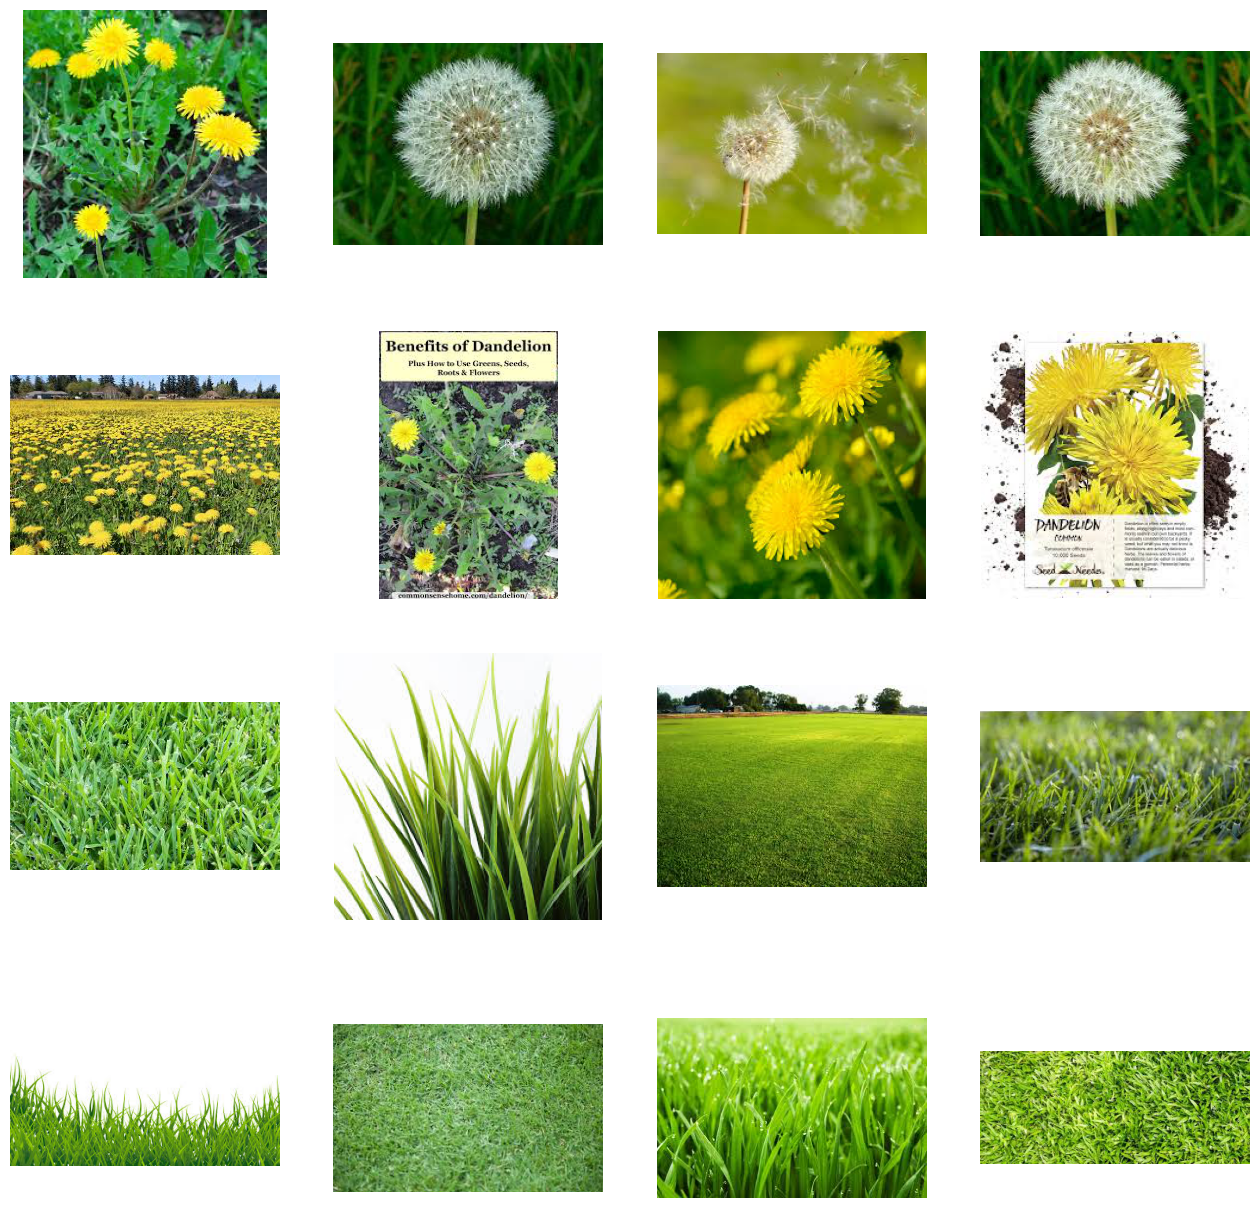

In [9]:
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Index for iterating over images

# Get the filenames in the directory
train_dandelion_fnames = os.listdir(train_dandelion_dir)
train_grass_fnames = os.listdir(train_grass_dir)

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pix = [os.path.join(train_dandelion_dir, fname) 
                      for fname in train_dandelion_fnames[pic_index-8:pic_index]]
next_grass_pix = [os.path.join(train_grass_dir, fname) 
                  for fname in train_grass_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pix+next_grass_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = plt.imread(img_path)
    plt.imshow(img)

plt.show()


In [10]:
!pip install --upgrade tensorflow

In [1]:
!pip install tensorflow


from keras.preprocessing.image import ImageDataGenerator

# Data Generator for Train dataset
train_datagen = ImageDataGenerator(
        rescale=1./255, # normalize pixel values to [0,1]
        shear_range=0.2, # shear transformation
        zoom_range=0.2, # zoom transformation
        horizontal_flip=True) # horizontal flip transformation

# Data Generator for Validation dataset
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create a training generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train', # source directory of images
        target_size=(200, 200), # input image size
        batch_size=32, # batch size
        class_mode='binary') # class mode: binary (for 2 classes) or categorical (for more than 2 classes)

# Create a validation generator
valid_generator = valid_datagen.flow_from_directory(
        '/tmp/valid', # source directory of images
        target_size=(200, 200), # input image size
        batch_size=32, # batch size
        class_mode='binary') # class mode: binary (for 2 classes) or categorical (for more than 2 classes)


Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


In [3]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# build the model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [5]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
        'C:/Users/USER/Downloads/Gambar/train',
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/USER/Downloads/Gambar/valid',
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')


Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=8, # total_train / batch_size
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8, # total_val / batch_size
    verbose=2
)


Epoch 1/15
8/8 - 38s - loss: 0.8430 - accuracy: 0.5938 - val_loss: 0.6513 - val_accuracy: 0.6406 - 38s/epoch - 5s/step
Epoch 2/15
8/8 - 16s - loss: 0.7067 - accuracy: 0.5469 - val_loss: 0.6840 - val_accuracy: 0.5781 - 16s/epoch - 2s/step
Epoch 3/15
8/8 - 16s - loss: 0.6784 - accuracy: 0.5312 - val_loss: 0.6675 - val_accuracy: 0.6406 - 16s/epoch - 2s/step
Epoch 4/15
8/8 - 18s - loss: 0.6478 - accuracy: 0.5312 - val_loss: 0.6949 - val_accuracy: 0.4844 - 18s/epoch - 2s/step
Epoch 5/15
8/8 - 19s - loss: 0.6480 - accuracy: 0.5556 - val_loss: 0.6611 - val_accuracy: 0.5781 - 19s/epoch - 2s/step
Epoch 6/15
8/8 - 20s - loss: 0.5301 - accuracy: 0.6875 - val_loss: 0.6272 - val_accuracy: 0.6719 - 20s/epoch - 3s/step
Epoch 7/15
8/8 - 18s - loss: 0.5427 - accuracy: 0.7188 - val_loss: 0.6662 - val_accuracy: 0.4844 - 18s/epoch - 2s/step
Epoch 8/15
8/8 - 16s - loss: 0.6652 - accuracy: 0.6719 - val_loss: 1.1070 - val_accuracy: 0.4844 - 16s/epoch - 2s/step
Epoch 9/15
8/8 - 17s - loss: 0.6586 - accuracy: 

In [14]:
model.evaluate(validation_generator)

20/20 [==============================] - 7s 370ms/step - loss: 0.5900 - accuracy: 0.6943


[0.5899673700332642, 0.6942675113677979]

In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
# Generate predictions on validation set
validation_generator.reset()
y_pred_prob = model.predict(validation_generator, verbose=1)

20/20 [==============================] - 7s 323ms/step


In [22]:
# Compute positive class probabilities
y_pred_prob_pos = y_pred_prob

In [23]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(validation_generator.classes, y_pred_prob_pos)

In [24]:
# Compute AUC score
roc_auc = auc(fpr, tpr)

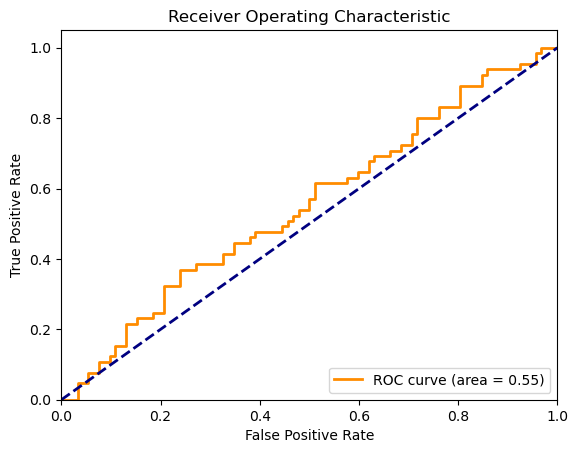

In [27]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
model.save('model_2.h5')

In [36]:
!pip install tensorflow

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing import image

img_path = 'Downloads/Gambar/train/dandelion/00000013.jpg'  # replace with the path to your image
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
print(prediction)

if prediction < 0.5:
    print("Ini gambar rumput")
else:
    print("Ini gambar dandelion")


1/1 [==============================] - 0s 121ms/step
[[0.]]
Ini gambar rumput


Ganti model neural network di atas dengan arsitektur CNN

In [ ]:
import tensorflow as tf

# Load dataset
train_dir = '/path/to/training/directory'
validation_dir = '/path/to/validation/directory'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

# Build CNN model
model = tf.keras.models.Sequential([
    # Layer Konvolusi Pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Layer Konvolusi Kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Layer Konvolusi Ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Layer Konvolusi Keempat
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Layer Konvolusi Kelima
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten layer untuk mengubah output menjadi satu dimensi
    tf.keras.layers.Flatten(),
    
    # Fully connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer dengan fungsi aktivasi sigmoid untuk binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()